# Data Validation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
product_sales = pd.read_csv('product_sales.csv')

Checking all the missing values.

In [29]:
product_sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [30]:
print("about " + str(round(1074/product_sales['revenue'].count()*100, 2)) + " % is missing.")

about 7.71 % is missing.


Checking the unique values to identify any unexpected or erroneous data.

In [31]:
product_sales.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In sales_method column we see 5 different method which is wrong (we should have 3 type of methods).

In [32]:
product_sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

We need to replace em + call and email. Before replacement:

In [33]:
product_sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

After replacement:

In [34]:
product_sales['sales_method'] = product_sales['sales_method'].replace('email', 'Email')
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'Email + Call')
product_sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

Investigating the state column, looks good.

In [35]:
product_sales['state'].value_counts()

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [36]:
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


Notice that years_as_customer has a maximum value of 63. That's not possible since the company was founded in 1984, the maximum value for years_as_customer should be 40. let's investigate that.

In [37]:
(product_sales[product_sales['years_as_customer'] > 40])

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


there are outliers in years_as_customer, because the company founded in 1984 and we can't have a customers since 63 years ago. Since the years_as_customer value is filled out wrong, I can't trust this rows information to be true. There are only two records as years_as_customer outliers, so I'd rather drop them.

In [38]:
product_sales = product_sales.drop(product_sales[product_sales.years_as_customer > 40].index)
product_sales.shape

(14998, 8)

In [39]:
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,13924.000000,14998.000000,14998.000000
mean,3.09828,10.084678,93.937828,4.959261,24.990799
std,1.65649,1.812334,47.437281,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,52.470000,1.000000,23.000000
50%,3.00000,10.000000,89.500000,3.000000,25.000000
75%,5.00000,11.000000,107.330000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


Last but not least, we need to fill out the Null values. 

Correlation is: 0.6961849311428413


<AxesSubplot: xlabel='nb_sold', ylabel='revenue'>

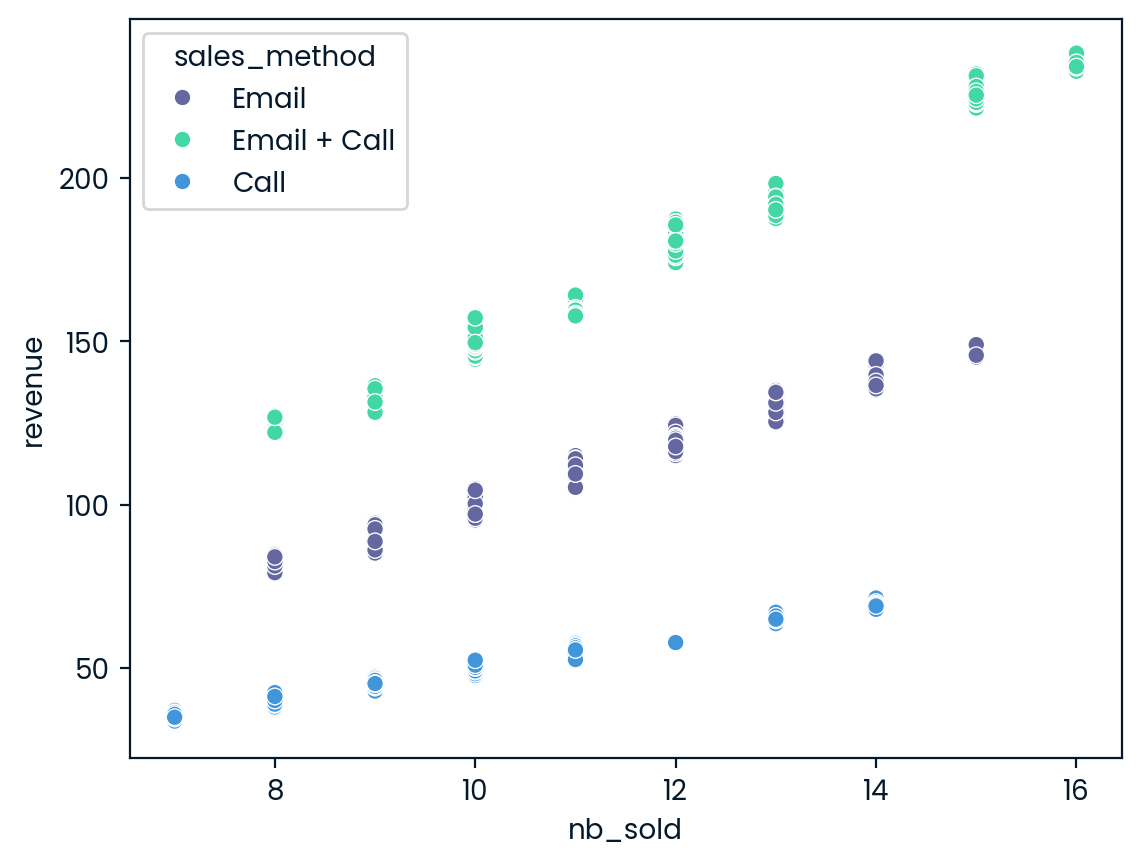

In [40]:
print("Correlation is: " + str(product_sales['nb_sold'].corr(product_sales['revenue'])))
sns.scatterplot(data=product_sales, x='nb_sold', y ='revenue', hue='sales_method')

The corralation between nb_sold and revenue is 0.7.
We can clearly see a pattern here per each nb_sold and sales_method. Since there is a relationship between the 'revenue' and the 'sales_method' column, let's take the median revenue of each nb_sold per sales_method category and fix it on NA values.

After the replacement:

In [41]:
median_revenue_per_nb_sold_per_sales_method = product_sales.groupby(['sales_method', 'nb_sold'])['revenue'].transform('median')
product_sales['revenue'] = product_sales['revenue'].fillna(median_revenue_per_nb_sold_per_sales_method)
product_sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

Checking everything once more.

In [42]:
print('head')
product_sales.head()

head


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,99.43,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,108.35,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [43]:
print('describe')
product_sales.describe()

describe


,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.09828,10.084678,95.714514,4.959261,24.990799
std,1.65649,1.812334,48.386338,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,52.760000,1.000000,23.000000
50%,3.00000,10.000000,90.000000,3.000000,25.000000
75%,5.00000,11.000000,108.350000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


In [44]:
print('info')
product_sales.info()

info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


No further action is needed.

# Exploratory Analysis

## 1. How many customers were there for each approach?
You can see the number of customers through the countplot and the corresponding table below.

In [45]:
product_sales['sales_method'].value_counts()

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64

Text(0.5, 1.0, 'Customers per Sales Method')

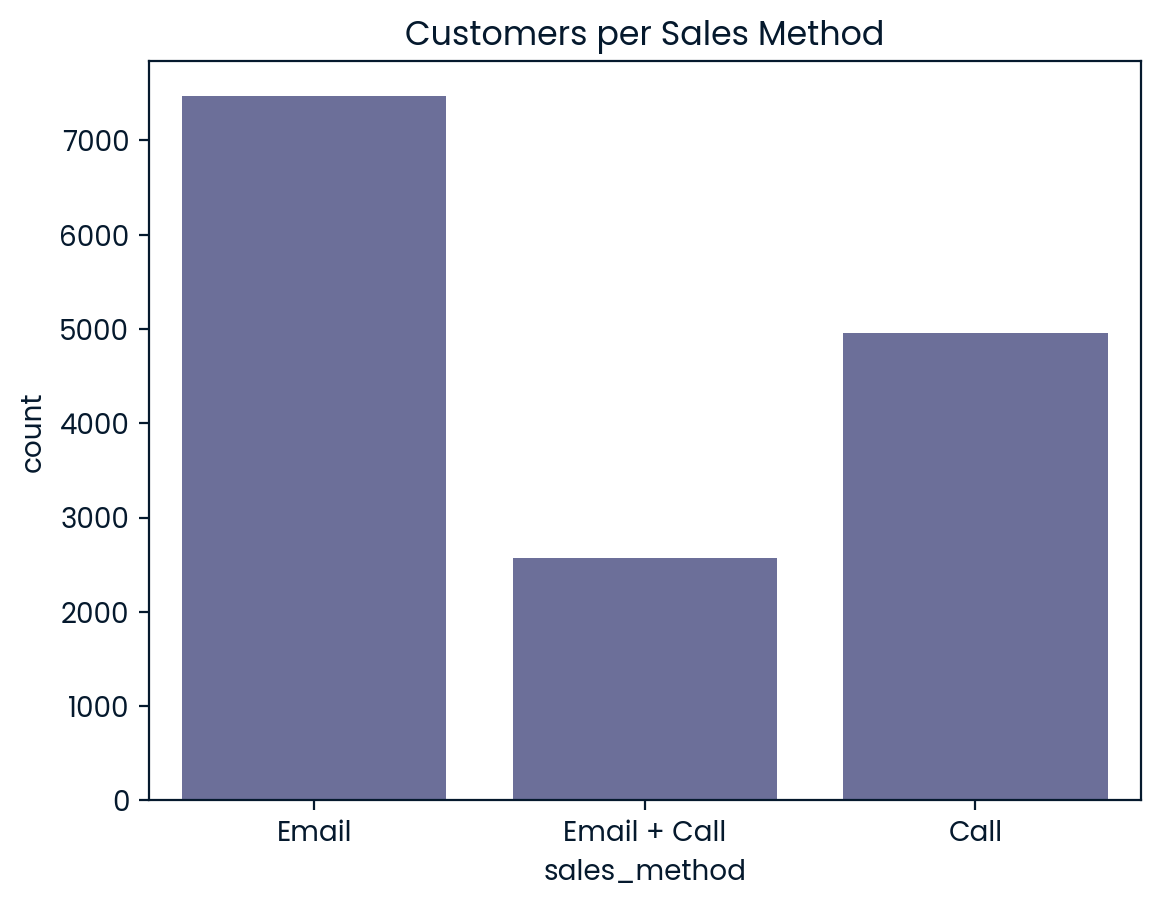

In [46]:
sns.countplot(data=product_sales, x='sales_method')
plt.title("Customers per Sales Method")

We can clearly see that the most customers fall within the Email category. This indicates that the sales team found this approach to be the easiest. In contrast, Email + Call method was not favoured as much as the Call method. This may indicate that the Sales team is not encouraged to adopt the Call + Email method presumably because it is more time-consuming than other methods

## 2. what does the spread of the revenue look like overall? And for each method?
You can see the distribution with the boxplot.

Text(0.5, 1.0, 'Spread of Revenue Overall')

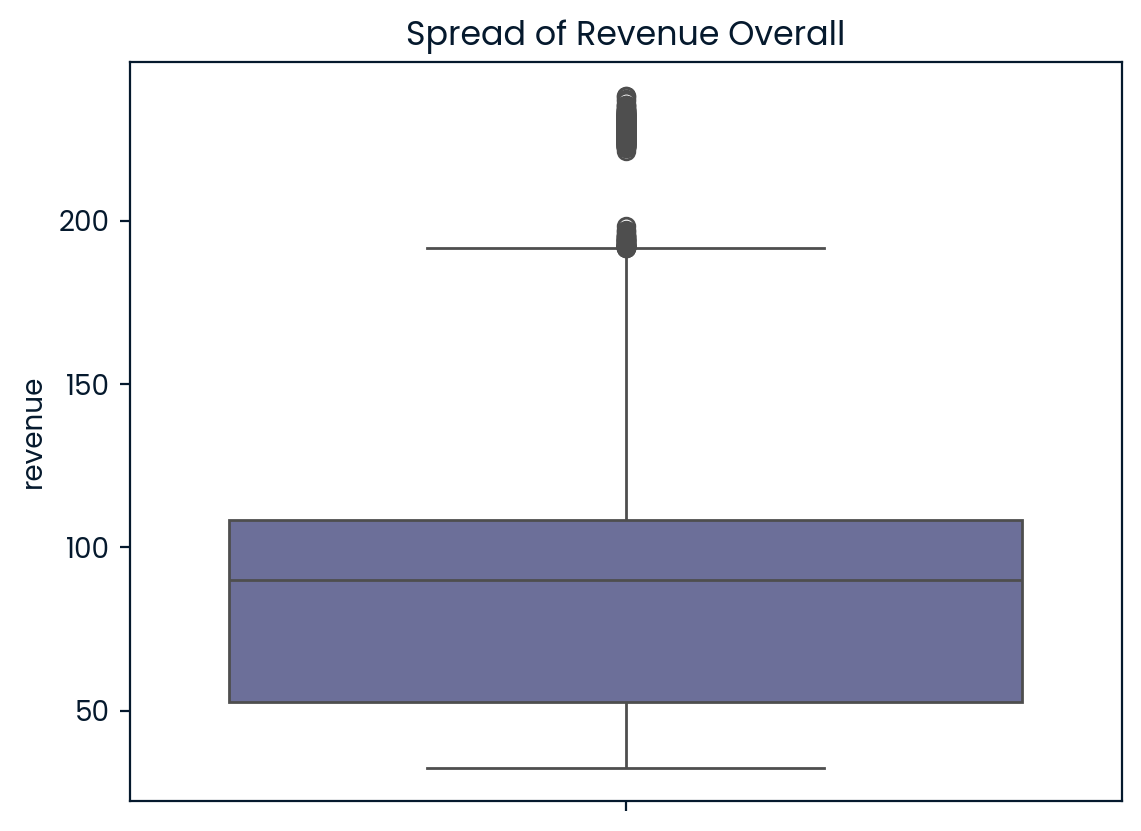

In [47]:
sns.boxplot(data=product_sales, y ='revenue')
plt.title("Spread of Revenue Overall")

Text(0.5, 1.0, 'Spread of Revenue per Method')

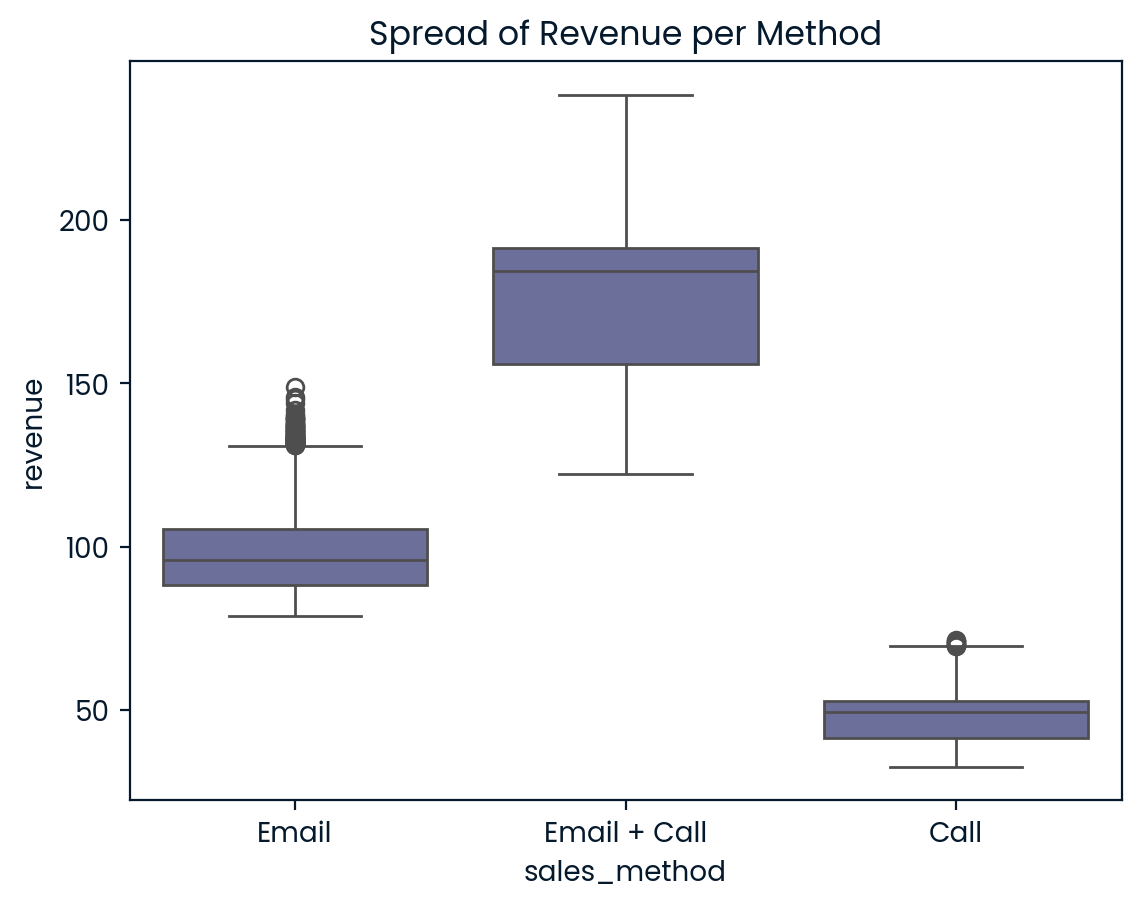

In [48]:
sns.boxplot(data=product_sales, x='sales_method', y ='revenue')
plt.title("Spread of Revenue per Method")

It's clear that the Email + Call method results in higest revenue. And Call method results in lowest.

## 3. Was there any difference in revenue over time for each of the methods?
Yes. Line plots below shows the change of total revenue as weeks went by.

Text(0.5, 0, 'Week')

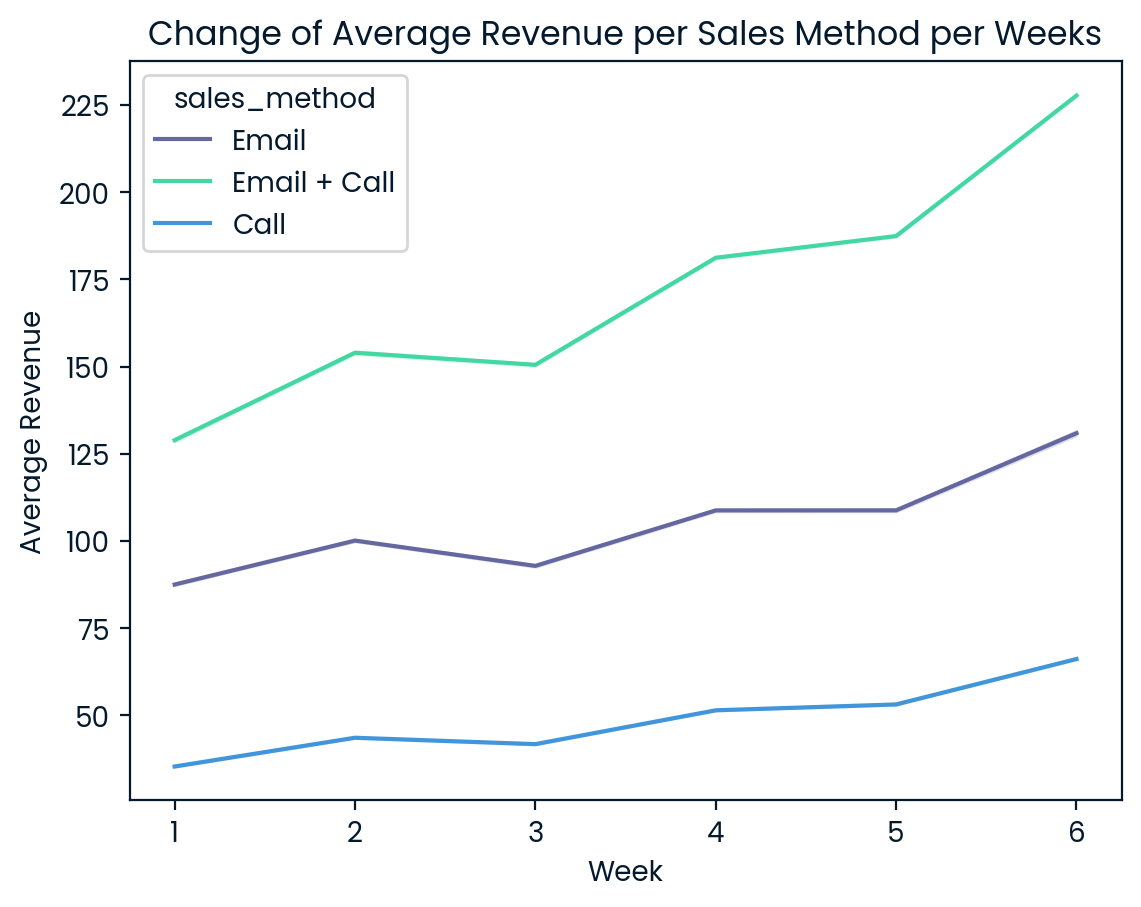

In [49]:
sns.lineplot(data=product_sales, x='week', y ='revenue', hue='sales_method')
plt.title("Change of Average Revenue per Sales Method per Weeks")
plt.ylabel('Average Revenue')
plt.xlabel('Week')

You can see that the Email + Call aproach is going up with more slope than the others. This means that we expect the Email + Call method increases the most in future.

Text(0.5, 0, 'Week')

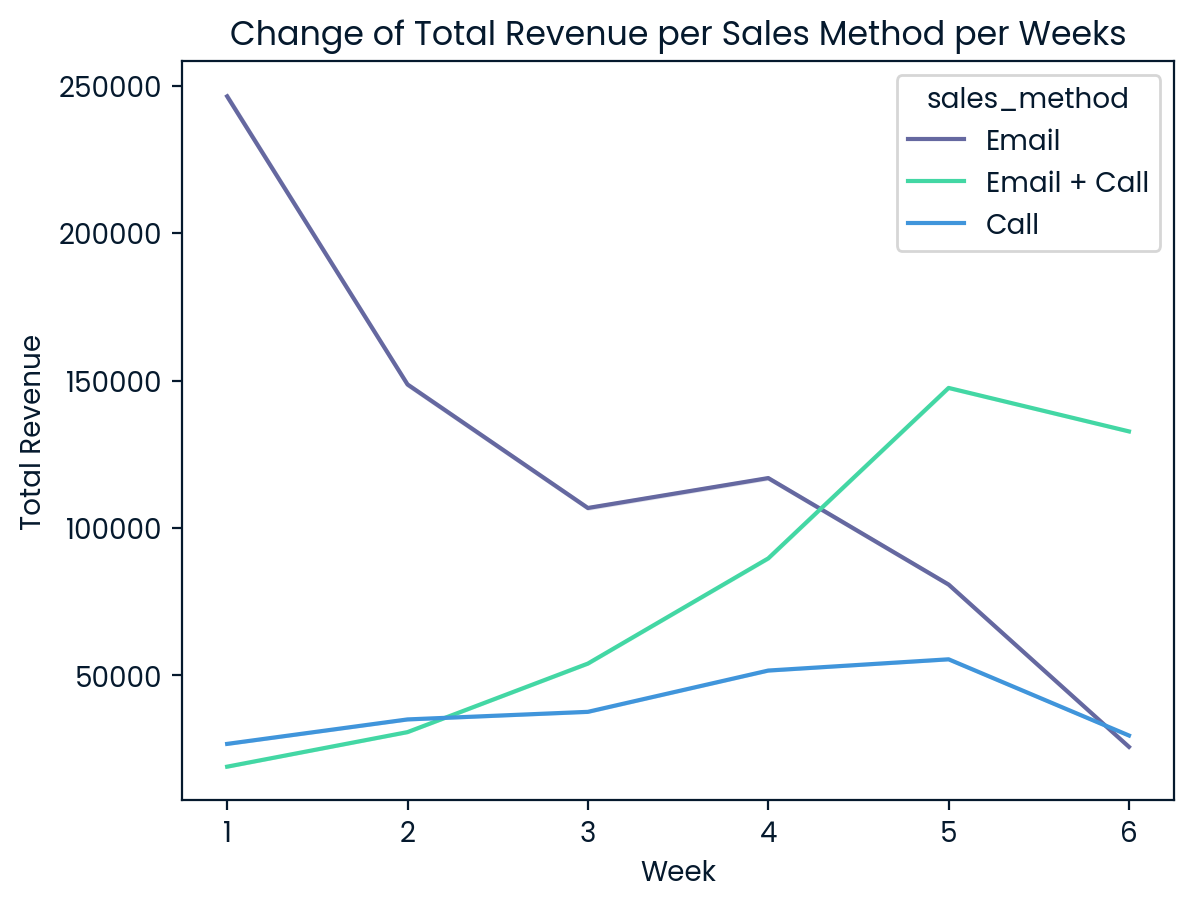

In [50]:
 sns.lineplot(data=product_sales, x='week', y ='revenue', hue='sales_method', estimator='sum')
plt.title("Change of Total Revenue per Sales Method per Weeks")
plt.ylabel('Total Revenue')
plt.xlabel('Week')

Initially, the revenue was reaching high levels. However, after the first week, we observed a gradual decline until the third week. It is worth noting that during the third week, in the "Email" method we've sent a second email to customers, which coincided with the sudden growth in revenue.

## 4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.
Here are the final results:

- Call  : Takes too long (30 mins). Low Revenue Rate
- Email : Takes almost no time. Medium Revenue Rate
- Email : Takes almost 10 mins time. Very High Revenue Rate

Call method should definitely be set aside.
The Email method is a good option that saves the sales team much time.
Email + Call is the best one in terms of revenue, at the cost of about 10 minutes time per customer.

If you perfare time save over revenue, go with the Email.
If you perfare revenue over time save, go with the Email + Call.

My Suggestion is we should go with the Email + Call method, since the average difference between the methods is about 87$. And, in time the sales would increase much more than the other methods do. It is definitely worth the extra 10 minutes time of our sales team.

# Definition of a metric for the busniess to monitor

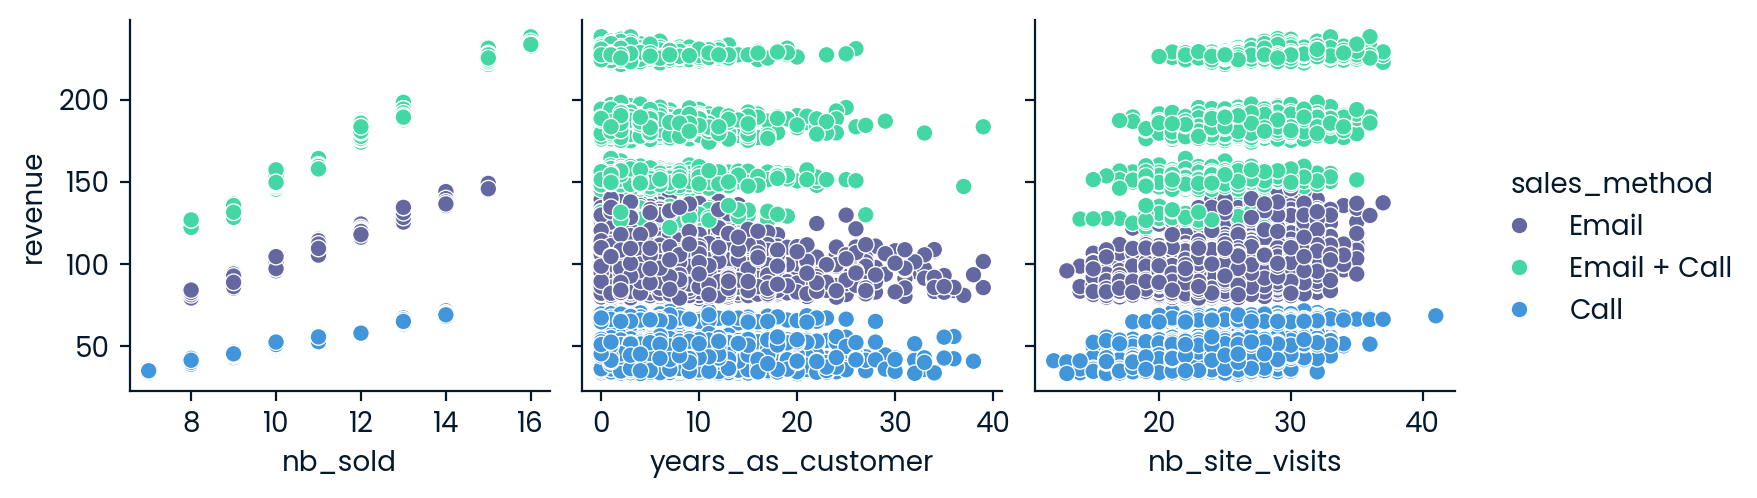

In [51]:
sns.pairplot(data=product_sales, x_vars=['nb_sold', 'years_as_customer', 'nb_site_visits'], y_vars=['revenue'], hue = 'sales_method')

You can also see that other factors such as years_as_customer and nb_site_visits are almost irrelevant to revenue.

Text(0.5, 1.0, 'Total Revenue per Method per State')

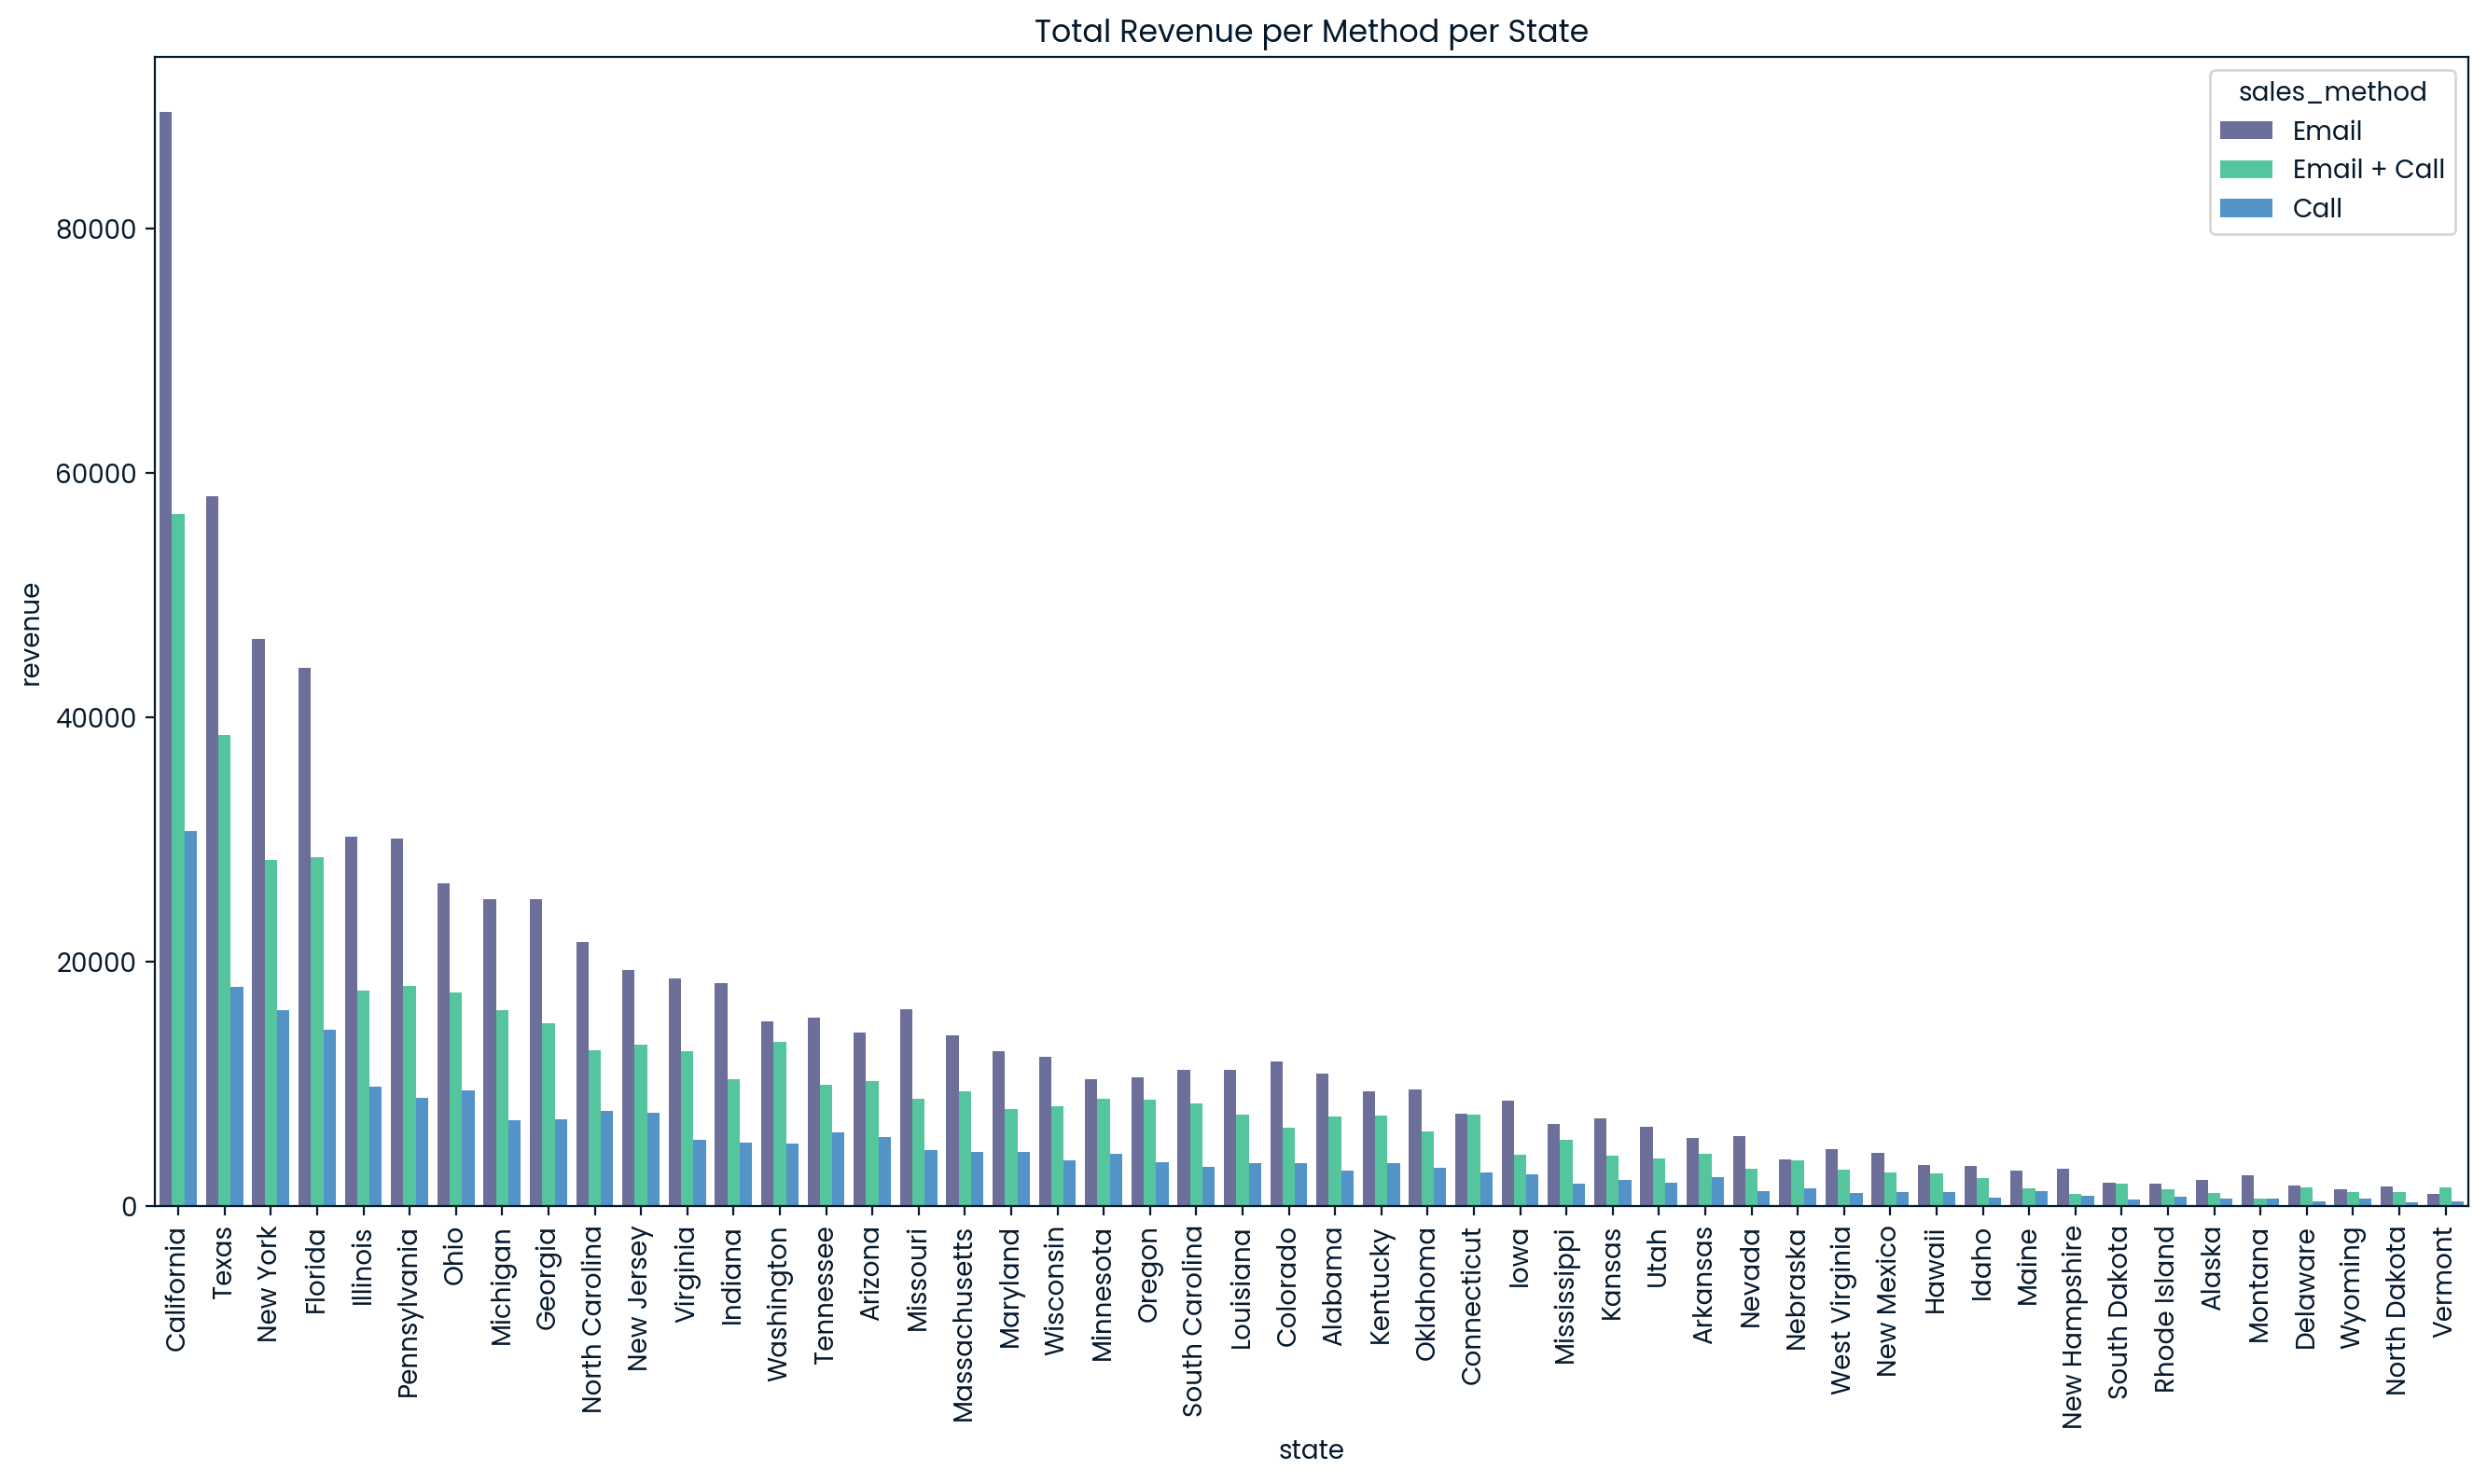

In [52]:
revenue_per_state = product_sales.groupby('state')['revenue'].sum().reset_index()
# Sort the values based on the total revenue
revenue_per_state = revenue_per_state.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(product_sales, x="state", y="revenue",hue='sales_method', estimator="sum", errorbar=None, order=revenue_per_state['state'])
plt.xticks(rotation=90)
plt.title("Total Revenue per Method per State")

No significant variation was observed among the methods. However, it is evident that "California," "Texas," "New York," and "Florida" yielded substantially higher revenue compared to other states. To capitalize on this lucrative opportunity, it is advisable to prioritize expanding our networking in these states, investing additional resources and effort to meet the heightened demand.

Text(0.5, 0, 'Week')

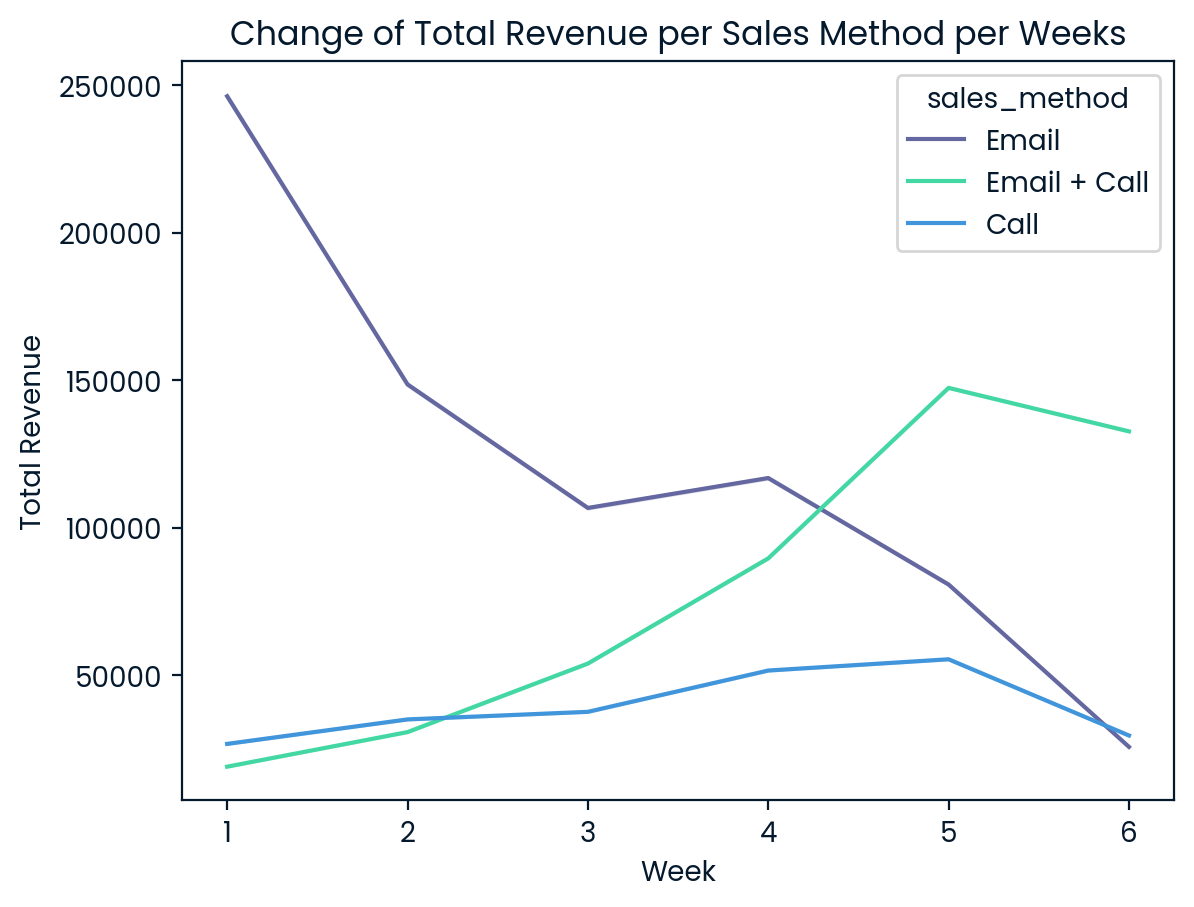

In [53]:
sns.lineplot(data=product_sales, x='week', y ='revenue', hue='sales_method', estimator='sum')
plt.title("Change of Total Revenue per Sales Method per Weeks")
plt.ylabel('Total Revenue')
plt.xlabel('Week')

In [54]:
d = product_sales.groupby(['week', 'sales_method'])['revenue'].agg(['sum']).reset_index().pivot(index='week', columns='sales_method', values='sum').round(2)
d

sales_method,Call,Email,Email + Call
week,,,
1,26796.43,246357.91,19077.76
2,35095.39,148667.28,30794.85
3,37666.24,106781.60,54031.24
4,51665.87,116924.80,89692.34
5,55479.73,80823.27,147493.30
6,29641.22,25788.49,132748.56


We expect that the difference increases as time goes by. However, if in decreases we need to reconsider our method.

You should keep track of your average revenue. If revenue average of Email + Call method drops down to less or equal to Email or Call method, then it would be more suitable to switch.

# Final summary including recommendations that the business should undertake
My Suggestion is we should go with the Email + Call method, since as time goes by, the sales would increase much more than the other methods do. It is definitely worth the extra 10 minutes time of our sales team.
You should keep track of your average revenue. If average revenue of Email + Call method becomes less or equal to Email or Call method, then it would be more suitable to revise the approach and choose the highest revenue generating one.